In [32]:
# Ramazan Üstüntaş
# 150401054
# Multiclass NN Signature Dataset
# Herkes uygun bir şekilde imzalarını hazırlamadığı için hazır olan imza dosyalarından 10 tane bulabildim 
# ve 10 kişinin imza testini yapabildim.
from os import listdir
from os.path import isfile
import matplotlib.pyplot as plt
import numpy as np
import os
from skimage.transform import resize

In [33]:
path = './data_signature/'

folders = listdir(path)
list_of_img = []
imglabels = {'170401076':'0', '150401006':'1', '150401054':'2', '160401002':'3', '160401025':'4', '160401050':'5', '160401051':'6', 
          '170401012':'7', '170401025':'8', '170401073':'9'}
y = []
X_test = []
y_test = []

for folder in folders:
    
    print(folder)
    for i in range(1,32):
        imgpath = path + folder + '/' + folder + '_'
        if i<10:
            imgpath = imgpath + '0' + str(i) + '_cropped_.png'
        elif i>10 and i!=31:
            imgpath = imgpath + str(i) + '_cropped_.png'
        else:
            imgpath = imgpath + 'test_cropped_.png'

        img = plt.imread(imgpath)
        img = img[:,:,0]
        img = resize(img, (200,200))
        img = np.ndarray.flatten(img)
        
        if i==31:
            X_test.append(img)
            y_test.append(imglabels[folder])
        
        else:
            list_of_img.append(img)
            y.append(imglabels[folder])

150401006
150401054
160401002
160401025
160401050
160401051
170401012
170401025
170401073
170401076


In [34]:
len(list_of_img)

300

In [35]:

X = np.array(list_of_img)
y = np.array(y, dtype=object)

In [36]:
X_test = np.array(X_test)
y_test = np.array(y_test, dtype=object)

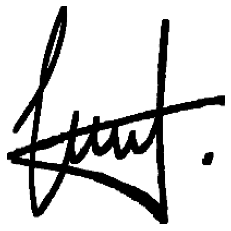

2


In [37]:
i = 36
plt.imshow(X[i].reshape(200,200), cmap ='gray')
plt.axis("off")
plt.show()
print(y[i])

In [38]:
(X.shape), (y.shape), (X_test.shape, y_test.shape)

((300, 40000), (300,), ((10, 40000), (10,)))

In [39]:
y

array(['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
       '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2',
       '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3',
       '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4',
       '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5', '5',
       '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6',
       '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '7

In [40]:

X = X / 255

In [41]:
X_test = X_test / 255

In [42]:
digits = 10

examples = y.shape[0]

y = y.reshape(1, examples)

Y_new = np.eye(digits)[y.astype('int32')]
Y_new = Y_new.T.reshape(digits, examples)

In [43]:
digits = 10

examples = y_test.shape[0]

y_test = y_test.reshape(1, examples)

Yt_new = np.eye(digits)[y_test.astype('int32')]
Yt_new = Yt_new.T.reshape(digits, examples)

In [44]:
(y.shape, Y_new.shape), (y_test.shape, Yt_new.shape)

(((1, 300), (10, 300)), ((1, 10), (10, 10)))

In [45]:
m = 300
m_test = X.shape[0] - m

#X_train, X_test = X[:m].T, X[m:].T
#Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]
X_train = X[:m].T
Y_train = Y_new[:,:m]
X_test = X_test.T
Y_test = Yt_new

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]

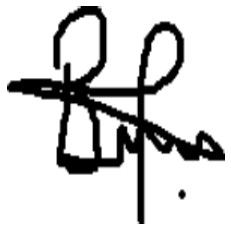

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [46]:
i = 250
plt.imshow(X_train[:,i].reshape(200,200), cmap = 'gray')
plt.axis("off")
plt.show()
Y_train[:,i]

In [47]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [48]:
def compute_multiclass_loss(Y, Y_hat):

    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1/m) * L_sum

    return L

In [49]:
n_x = X_train.shape[0]
n_h = 64
learning_rate = 1

W1 = np.random.randn(n_h, n_x)
b1 = np.zeros((n_h, 1))
W2 = np.random.randn(digits, n_h)
b2 = np.zeros((digits, 1))

X = X_train
Y = Y_train

for i in range(2000):

    Z1 = np.matmul(W1,X) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

    cost = compute_multiclass_loss(Y, A2)

    dZ2 = A2-Y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * sigmoid(Z1) * (1 - sigmoid(Z1))
    dW1 = (1./m) * np.matmul(dZ1, X.T)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  9.818916953283306
Epoch 100 cost:  1.9469492802039827
Epoch 200 cost:  1.534002198163876
Epoch 300 cost:  1.2118540460674425
Epoch 400 cost:  0.9447974287701645
Epoch 500 cost:  0.7350989455038381
Epoch 600 cost:  0.5692362253989341
Epoch 700 cost:  0.45066225643436236
Epoch 800 cost:  0.3666046492886759
Epoch 900 cost:  0.3030380515763165
Epoch 1000 cost:  0.25429243411961716
Epoch 1100 cost:  0.21634935974083846
Epoch 1200 cost:  0.18636516399350447
Epoch 1300 cost:  0.162318268516362
Epoch 1400 cost:  0.14275954856238907
Epoch 1500 cost:  0.12663977889055145
Epoch 1600 cost:  0.11319113344350903
Epoch 1700 cost:  0.101845537857232
Epoch 1800 cost:  0.09217797726979375
Epoch 1900 cost:  0.08386677329109948
Final cost: 0.07673268817922255


In [50]:
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



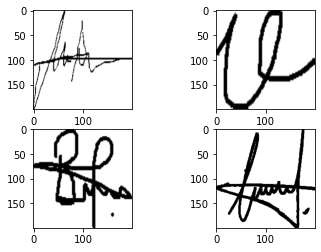

In [66]:
plt.subplot(2,2,1)
plt.imshow(X[:,100].reshape(200,200), cmap ='gray')
plt.subplot(2,2,2)
plt.imshow(X[:,150].reshape(200,200), cmap ='gray')
plt.subplot(2,2,3)
plt.imshow(X[:,250].reshape(200,200), cmap ='gray')
plt.subplot(2,2,4)
plt.imshow(X[:,155].reshape(200,200), cmap ='gray')
plt.show()

In [67]:
# 28x28 veri boyuntunda doğru sonuçlar alamadım ve yanlış tahminlerde bulundu.Accuracy=0.68 çıktı
# Bunun sebebi imza verilerini 200x200 olarak düzenlediğimiz için 28x28 veri boyutunun tahminlerini yanlış yapması.
# Veri boyutunu kod kısmında 200x200 olarak değiştirdiğimde hata almadım ve bütün tahminleri doğru bir şekilde gerçekleştirdi.
# Şuanki son hali bütün imzaları doğru tahmin etmekte ve accuracy(doğruluk) 1.0 çıkmaktadır.